In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

In [2]:
class Planeta:
    
    def __init__(self, e, a, t):
        
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor
        
        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)
        
        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1+self.e)/(self.a_*(1.-self.e)) )
        
        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)

        self.T = 0 # Periodo
        
        # El valor del pasado
        self.rp = self.r
        
    def GetAceleration(self):
        
        d = np.linalg.norm(self.r)
        self.a = -self.G/d**3*self.r
        
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt
        else:
            
            # rp pasado, r presente rf futuro
            self.rf = 2*self.r - self.rp + self.a*self.dt**2
            self.v = (self.rf - self.rp)/(2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
    
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
    
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def GetPerihelio(self):
        
        Dist = np.linalg.norm(self.R,axis=1)
        
        timeup = []
        
        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])
            
        return timeup
    
    def GetPeriod(self):
        
        perihelio_list =self.GetPerihelio()
        self.T = perihelio_list[-1] - perihelio_list[-2]
        
        return self.T

In [3]:
def GetPlanetas(t):
    
    Mercurio = Planeta(0.2056,0.307,t)
    Venus = Planeta(0.0067,0.7233,t)
    Tierra = Planeta(0.01671,1.,t)
    Marte = Planeta(0.0934,1.524,t)
    Jupiter = Planeta(0.0489,5.203,t)
    
    return [Mercurio,Venus,Tierra, Marte, Jupiter]

In [4]:
dt = 0.001
tmax = 50
t = np.arange(0.,tmax,dt)
Planetas = GetPlanetas(t)

In [5]:
def RunSimulation(t,Planetas):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        #print(it)
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
            # Aca debes agregar la interaccion con la pared
    return Planetas

In [6]:
Planetas = RunSimulation(t,Planetas)

Running simulation:   0%|          | 0/50000 [00:00<?, ? Steps/s]

Running simulation: 100%|██████████| 50000/50000 [00:03<00:00, 13231.66 Steps/s]


In [7]:
print(Planetas[0].GetPerihelio())
print(Planetas[1].GetPerihelio())
print(Planetas[2].GetPerihelio())
print(Planetas[3].GetPerihelio())
print(Planetas[4].GetPerihelio())


[0.168, 0.338, 0.509, 0.679, 0.85, 1.02, 1.19, 1.361, 1.5310000000000001, 1.702, 1.872, 2.043, 2.213, 2.383, 2.5540000000000003, 2.724, 2.895, 3.065, 3.235, 3.406, 3.576, 3.747, 3.9170000000000003, 4.088, 4.258, 4.428, 4.599, 4.769, 4.94, 5.11, 5.28, 5.4510000000000005, 5.621, 5.792, 5.962, 6.132000000000001, 6.303, 6.473, 6.644, 6.814, 6.985, 7.155, 7.325, 7.496, 7.666, 7.837, 8.007, 8.177, 8.348, 8.518, 8.689, 8.859, 9.029, 9.200000000000001, 9.370000000000001, 9.541, 9.711, 9.882, 10.052, 10.222, 10.393, 10.563, 10.734, 10.904, 11.074, 11.245000000000001, 11.415000000000001, 11.586, 11.756, 11.926, 12.097, 12.267, 12.438, 12.608, 12.779, 12.949, 13.119, 13.290000000000001, 13.46, 13.631, 13.801, 13.971, 14.142, 14.312000000000001, 14.483, 14.653, 14.824, 14.994, 15.164, 15.335, 15.505, 15.676, 15.846, 16.016000000000002, 16.187, 16.357, 16.528, 16.698, 16.868000000000002, 17.039, 17.209, 17.38, 17.55, 17.721, 17.891000000000002, 18.061, 18.232, 18.402, 18.573, 18.743000000000002, 18

In [8]:
print(Planetas[0].GetPeriod())
print(Planetas[1].GetPeriod())
print(Planetas[2].GetPeriod())
print(Planetas[3].GetPeriod())
print(Planetas[4].GetPeriod())

0.17099999999999937
0.6149999999999949
1.0
1.8810000000000002
11.868000000000002


In [9]:
scale = 20
t1 = t[::scale]

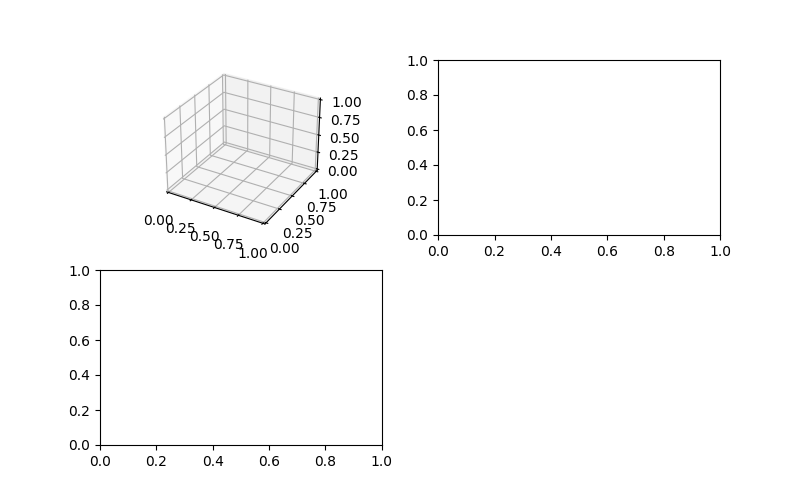

In [10]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(221,projection='3d')
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)

colors=['r','k','b']

def init():
    
    ax.clear()
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_zlim(-1,1)
    
    ax1.clear()
    ax1.set_xlim(-1,1)
    ax1.set_ylim(-1,1) 
    
    ax2.clear()
    ax2.set_xlim(-2,2)
    ax2.set_ylim(-2,2) 
    
def Update(i):
    
    init()
    
    for j, p in enumerate(Planetas):
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        z = p.GetPosition(scale)[i,2]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        vz = p.GetVelocity(scale)[i,2]
    
        ax.scatter(0,0,0,s=200,color='y')
        ax.quiver(x,y,z,vx,vy,vz,color=colors[j],length=0.03)
        
        ax.scatter(x,y,z,color=colors[j])
        
        circle = plt.Circle((x,y),0.1,color=colors[j],fill=True)
        ax1.add_patch(circle)
    
    # Mercurio visto desde tierra
    Mx = Planetas[0].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    My = Planetas[0].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    # Venus visto desde tierra
    Vx = Planetas[1].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    Vy = Planetas[1].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]

    # Tierra visto desde tierra
    Tx = Planetas[2].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    Ty = Planetas[2].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]

    # Marte visto desde tierra
    Mx = Planetas[3].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    My = Planetas[3].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]

    # Jupiter visto desde tierra
    Mx = Planetas[4].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    My = Planetas[4].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]

    
    ax2.scatter(Mx,My,marker='.',label='Mercurio')
    ax2.scatter(Vx,Vy,marker='.',label='Venus')
    ax2.scatter(Tx,Ty,marker='.',label='Tierra')
    ax2.scatter(Mx,My,marker='.',label='Marte')
    ax2.scatter(Mx,My,marker='.',label='Jupiter')
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

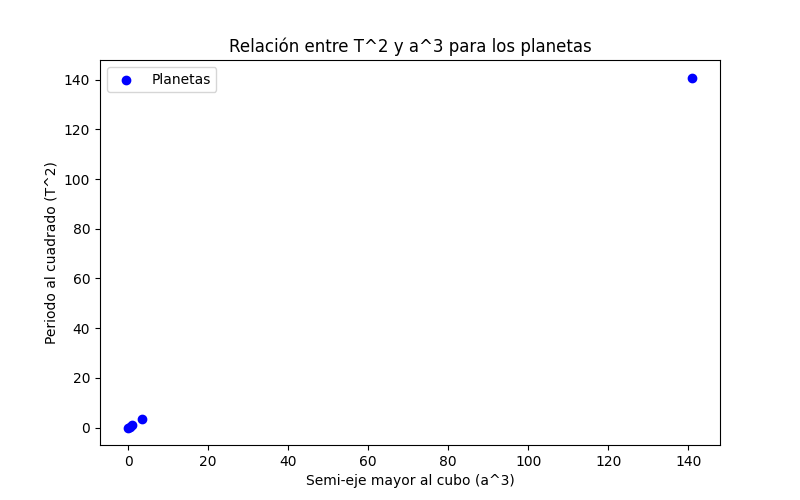

In [11]:


# Obtén los semi-ejes mayores al cubo y periodos al cuadrado para cada planeta
semi_ejes_al_cubo = [p.a_**3 for p in Planetas]
periodos_cuadrados = [p.T**2 for p in Planetas]

# Graficar T^2 vs a^3 para cada planeta
plt.figure(figsize=(8, 5))
plt.scatter(semi_ejes_al_cubo, periodos_cuadrados, color='b', label='Planetas')
plt.xlabel('Semi-eje mayor al cubo (a^3)')
plt.ylabel('Periodo al cuadrado (T^2)')
plt.title('Relación entre T^2 y a^3 para los planetas')
plt.legend()
plt.show()


In [12]:
def GetFit(x,y,n=2):
    x= np.array(x)
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)
    
    xsol = np.linalg.solve(AT,bT)
    
    return xsol

In [13]:
n = 2
param = GetFit(semi_ejes_al_cubo,periodos_cuadrados,n)
param

array([2.54724980e-04, 9.99518696e-01, 3.29960214e-06])

In [14]:
def GetModel(x,p):
    
    y = 0
    for n in range(len(p)):
        y += p[n]*x**n
        
    return y

In [15]:
_x = np.linspace(np.min(semi_ejes_al_cubo),np.max(semi_ejes_al_cubo),50)

_y = GetModel(_x,param)
N = len(semi_ejes_al_cubo)
sigma = np.random.uniform(0,0.2,N)

plt.errorbar(semi_ejes_al_cubo,periodos_cuadrados,yerr=sigma,fmt='o')
plt.plot(_x,_y,color='r')

In [16]:
pendiente = param[1]
punto_de_corte = param[0]
pendiente, punto_de_corte

(0.999518695564361, 0.00025472497956454315)

In [17]:
#La masa del sol es 1 en unidades gaussianas

def SolEnKg(masa_sol):
    return masa_sol*1.989e30

print("La masa del sol en kg es: ", SolEnKg(pendiente))

La masa del sol en kg es:  1.988042685477514e+30
